<a href="https://colab.research.google.com/github/manvendra-07/DL-Lab/blob/main/Week%204/200968146_DL_Week4_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-22 10:30:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   122MB/s    in 0.5s    

2022-08-22 10:30:43 (122 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [51]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [54]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [55]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [56]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.493.jpg', 'cat.987.jpg', 'cat.747.jpg', 'cat.671.jpg', 'cat.961.jpg', 'cat.560.jpg', 'cat.347.jpg', 'cat.842.jpg', 'cat.17.jpg', 'cat.724.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


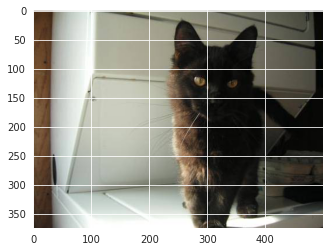

In [57]:
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

In [58]:
def AlexNet(shape, classes):

  model = tf.keras.Sequential([
      tf.keras.Input(shape=shape, name = "ConvolutionInput"),
      tf.keras.layers.Conv2D(96, strides=4 ,kernel_size=(11,11), activation='relu', padding='valid', name = "ConvolutionLayer-1"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2),name = "PoolingLayer-1"),
      tf.keras.layers.Conv2D(256, strides=1 ,kernel_size=(5,5), activation='relu', padding='same', name = "ConvolutionLayer-2"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2),name = "PoolingLayer-2"),
      tf.keras.layers.Conv2D(384, strides=1 ,kernel_size=(3,3), activation='relu', padding='same', name = "ConvolutionLayer-3"),
      tf.keras.layers.Conv2D(384, strides=1 ,kernel_size=(3,3), activation='relu', padding='same', name = "ConvolutionLayer-4"),
      tf.keras.layers.Conv2D(256, strides=1 ,kernel_size=(3,3), activation='relu', padding='same', name = "ConvolutionLayer-5"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=2, name = "PoolingLayer-3"),
      tf.keras.layers.Flatten(name = "NeuralNetInput"),
      tf.keras.layers.Dense(4096, activation='relu', name = "HiddenLayer-1"),
      tf.keras.layers.Dense(4096, activation='relu', name = "HiddenLayer-2"),
      tf.keras.layers.Dense(classes, activation='softmax', name = "OutputLayer")
    ])
  
  model.summary()
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [59]:
shape = (227,227,3)
classes = 2
model = AlexNet(shape, classes)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer-1 (Conv2D)  (None, 55, 55, 96)       34944     
                                                                 
 PoolingLayer-1 (MaxPooling2  (None, 27, 27, 96)       0         
 D)                                                              
                                                                 
 ConvolutionLayer-2 (Conv2D)  (None, 27, 27, 256)      614656    
                                                                 
 PoolingLayer-2 (MaxPooling2  (None, 13, 13, 256)      0         
 D)                                                              
                                                                 
 ConvolutionLayer-3 (Conv2D)  (None, 13, 13, 384)      885120    
                                                                 
 ConvolutionLayer-4 (Conv2D)  (None, 13, 13, 384)     

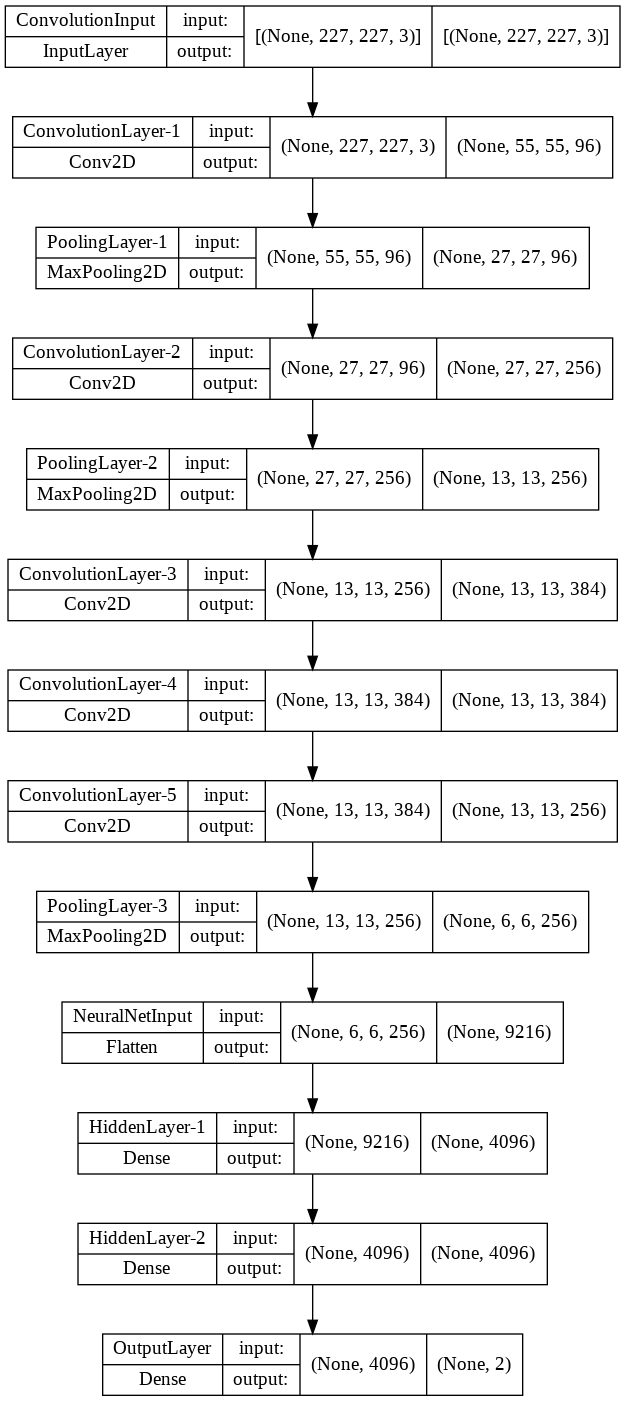

In [60]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [61]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=8, validation_data=validation_generator, validation_steps=50, verbose=1)

Epoch 1/8
100/100 [==============================] - 11s 107ms/step - loss: 1.0698 - accuracy: 0.4725 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/8
100/100 [==============================] - 10s 104ms/step - loss: 0.6936 - accuracy: 0.4970 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/8
100/100 [==============================] - 10s 104ms/step - loss: 0.6934 - accuracy: 0.4890 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/8
100/100 [==============================] - 10s 104ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/8
100/100 [==============================] - 10s 103ms/step - loss: 0.6933 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/8
100/100 [==============================] - 11s 109ms/step - loss: 0.6933 - accuracy: 0.4890 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/8
100/100 [==============================] - 10s 104ms/step - loss: 0.6932 - accuracy: 0.4930 - val_loss: 0.6931 - val_accuracy:

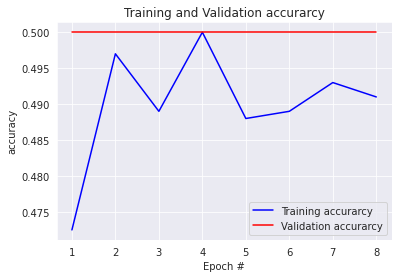

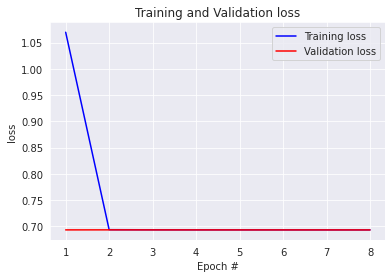

In [62]:
sns.set_style("darkgrid")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()